<a href="https://colab.research.google.com/github/zainali60/Spark-Assignment-4/blob/main/Exploratory_Data_Analysis_Terrorism_(Level_Intermediate)%C2%B6_Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The Sparks Foundation: Task 4 - Exploratory Data Analysis - Terrorism (Level - Intermediate)**

Author: Zain Ali

**Step -1: Importing the required Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
from plotnine import *
import warnings
warnings.filterwarnings('ignore')

**2) Importing the dataset**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/globalterrorismdb_0718dist.csv", engine='python')
data


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,2.0,0,The incident occurred near the town of Balcad.,12/31/2017: Assailants opened fire on a Somali...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,4,Military,36.0,Military Checkpoint,Somali National Army (SNA),Checkpoint,...,NaN,NaN,NaN,1.0,0.0,0.0,2.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,20

In [ ]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
data.shape

(181691, 135)

**Cleaning Data**

In [ ]:
df=data[['iyear', 'extended', 'country_txt', 'region_txt', 'provstate', 'city',
       'latitude', 'longitude', 'multiple', 'success', 'suicide',
       'attacktype1_txt', 'targtype1_txt', 'gname', 'nperps', 'claimed',
       'weaptype1_txt', 'nkill', 'nkillter', 'nwound', 'nwoundte', 'property',
       'propextent_txt']]

In [ ]:
df

,iyear,extended,country_txt,region_txt,provstate,city,latitude,longitude,multiple,success,suicide,attacktype1_txt,targtype1_txt,gname,nperps,claimed,weaptype1_txt,nkill,nkillter,nwound,nwoundte,property,propextent_txt
0,1970,0,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,0.0,1,0,Assassination,Private Citizens & Property,MANO-D,NaN,NaN,Unknown,1.0,NaN,0.0,NaN,0,NaN
1,1970,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,0.0,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,7.0,NaN,Unknown,0.0,NaN,0.0,NaN,0,NaN
2,1970,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,0.0,1,0,Assassination,Journalists & Media,Unknown,NaN,NaN,Unknown,1.0,NaN,0.0,NaN,0,NaN
3,1970,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,0.0,1,0,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,NaN,Explosives,NaN,NaN,NaN,NaN,1,NaN
4,1970,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,0.0,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,0,Somalia,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,0.0,1,0,Armed Assault,Military,Al-Shabaab,-99.0,1.0,Firearms,1.0,0.0,2.0,0.0,-9,NaN
181687,2017,0,Syria,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,0.0,1,0,Bombing/Explosion,Military,Muslim extremists,-99.0,0.0,Explosives,2.0,0.0,7.0,0.0,1,Unknown
181688,2017,0,Philippines,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,0.0,1,0,Facility/Infrastructure Attack,Private Citizens & Property,Bangsamoro Islamic Freedom Movement (BIFM),-99.0,0.0,Incendiary,0.0,0.0,0.0,0.0,1,Unknown
181689,2017,0,India,South Asia,Manipur,Imphal,24.798346,93.940430,0.0,0,0,Bombing/Explosion,Government (General),Unknown,-99.0,0.0,Explosives,0.0,0.0,0.0,0.0,-9,NaN


Checking Missing Values

In [ ]:
df.isnull().sum()

iyear                   0
extended                0
country_txt             0
region_txt              0
provstate             421
city                  434
latitude             4556
longitude            4557
multiple                1
success                 0
suicide                 0
attacktype1_txt         0
targtype1_txt           0
gname                   0
nperps              71115
claimed             66120
weaptype1_txt           0
nkill               10313
nkillter            66958
nwound              16311
nwoundte            69143
property                0
propextent_txt     117626
dtype: int64

Checking Duplicates

In [ ]:
df.duplicated().sum()

21759

In [ ]:
df.drop_duplicates(keep=False,inplace=True)

In [ ]:
df.duplicated().sum()

0

Fill Missing Values

In [ ]:
df.fillna((0),inplace =True)

In [ ]:
df.isnull().sum()

iyear              0
extended           0
country_txt        0
region_txt         0
provstate          0
city               0
latitude           0
longitude          0
multiple           0
success            0
suicide            0
attacktype1_txt    0
targtype1_txt      0
gname              0
nperps             0
claimed            0
weaptype1_txt      0
nkill              0
nkillter           0
nwound             0
nwoundte           0
property           0
propextent_txt     0
dtype: int64

Full Summary of Dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150726 entries, 0 to 181690
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   iyear            150726 non-null  int64  
 1   extended         150726 non-null  int64  
 2   country_txt      150726 non-null  object 
 3   region_txt       150726 non-null  object 
 4   provstate        150726 non-null  object 
 5   city             150726 non-null  object 
 6   latitude         150726 non-null  float64
 7   longitude        150726 non-null  float64
 8   multiple         150726 non-null  float64
 9   success          150726 non-null  int64  
 10  suicide          150726 non-null  int64  
 11  attacktype1_txt  150726 non-null  object 
 12  targtype1_txt    150726 non-null  object 
 13  gname            150726 non-null  object 
 14  nperps           150726 non-null  float64
 15  claimed          150726 non-null  float64
 16  weaptype1_txt    150726 non-null  obje

Count of Values in each column of Dataset


In [ ]:
df.nunique()

iyear                 47
extended               2
country_txt          205
region_txt            12
provstate           2845
city               36401
latitude           47875
longitude          47589
multiple               2
success                2
suicide                2
attacktype1_txt        9
targtype1_txt         22
gname               3473
nperps               112
claimed                3
weaptype1_txt         12
nkill                205
nkillter              96
nwound               238
nwoundte              44
property               3
propextent_txt         5
dtype: int64

Years in the Datase

In [ ]:
df['iyear'].unique()

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1986, 1982, 1983, 1984, 1985, 1987, 1988, 1989, 1990, 1991,
       1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017])

In [ ]:
df['iyear'].value_counts()

2014    14388
2015    12537
2016    11109
2013    10543
2017     9702
2012     7645
2008     4380
2011     4189
2009     4182
2010     4111
1992     3970
1991     3444
1989     3333
1988     2997
2007     2969
1994     2765
1990     2748
2006     2584
1984     2512
1997     2423
1983     2347
1996     2241
1987     2220
1981     2129
1985     2121
1986     2101
1995     2094
1980     2088
1982     2080
1979     2041
2005     1933
2001     1805
2000     1685
1999     1293
2002     1267
1978     1265
2003     1201
2004     1131
1977     1013
1998      851
1976      711
1975      586
1970      526
1974      428
1971      374
1973      357
1972      307
Name: iyear, dtype: int64

Total count of region in the Dataset

In [ ]:
df['region_txt'].value_counts()

South Asia                     40406
Middle East & North Africa     40322
Sub-Saharan Africa             15937
South America                  13636
Western Europe                 12404
Southeast Asia                 11442
Central America & Caribbean     7669
Eastern Europe                  4621
North America                   2885
East Asia                        631
Central Asia                     513
Australasia & Oceania            260
Name: region_txt, dtype: int64

Total Counts of Cities in the Dataset

In [ ]:
df['city'].value_counts()

Unknown          7357
Baghdad          4106
Karachi          1494
Mosul            1455
Mogadishu        1251
                 ... 
Cete                1
Borovica            1
Kalabayr            1
Anguilla Cays       1
Atak                1
Name: city, Length: 36401, dtype: int64

Total counts of Attack type in the Dataset

In [ ]:
df['attacktype1_txt'].value_counts()

Bombing/Explosion                      68206
Armed Assault                          38300
Assassination                          16803
Hostage Taking (Kidnapping)            10446
Facility/Infrastructure Attack          8024
Unknown                                 6567
Hostage Taking (Barricade Incident)      873
Unarmed Assault                          871
Hijacking                                636
Name: attacktype1_txt, dtype: int64

Total Counts of Target type in Datase

In [ ]:
df['targtype1_txt'].value_counts()

Private Citizens & Property       35573
Military                          25540
Police                            21948
Government (General)              17895
Business                          14968
Transportation                     5476
Unknown                            4146
Religious Figures/Institutions     3928
Educational Institution            3538
Government (Diplomatic)            3177
Utilities                          3050
Terrorists/Non-State Militia       2843
Journalists & Media                2616
Violent Political Party            1671
Airports & Aircraft                1257
NGO                                 936
Telecommunication                   822
Tourists                            415
Maritime                            318
Food or Water Supply                282
Abortion Related                    203
Other                               124
Name: targtype1_txt, dtype: int64

Getting the statistical info

In [ ]:
df.describe()

,iyear,extended,latitude,longitude,multiple,success,suicide,nperps,claimed,nkill,nkillter,nwound,nwoundte,property
count,150726.000000,150726.000000,150726.000000,1.507260e+05,150726.000000,150726.000000,150726.000000,150726.000000,150726.000000,150726.000000,150726.000000,150726.000000,150726.000000,150726.000000
mean,2003.307817,0.051252,23.100508,-5.410995e+02,0.084922,0.887976,0.042554,-41.771970,0.031381,2.623336,0.376557,3.282347,0.078281,-0.574791
std,13.008069,0.220512,18.055761,2.219945e+05,0.278767,0.315398,0.201850,108.003056,0.932705,12.256796,3.657595,37.612460,1.283436,3.127613
min,1970.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000,-99.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,-9.000000
25%,1991.000000,0.000000,9.666399,5.187080e+00,0.000000,1.000000,0.000000,-99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2009.000000,0.000000,30.996068,4.337298e+01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2014.000000,0.000000,34.516895,6.925793e+01,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,1.000000
max,2017.000000,1.000000,74.633553,1.793667e+02,1.000000,1.000000,1.000000,25000.000000,1.000000,1570.000000,500.000000,8191.000000,200.000000,1.000000


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
iyear,150726.0,2003.307817,13.008069,1.970000e+03,1991.000000,2009.000000,2014.000000,2017.000000
extended,150726.0,0.051252,0.220512,0.000000e+00,0.000000,0.000000,0.000000,1.000000
latitude,150726.0,23.100508,18.055761,-5.315461e+01,9.666399,30.996068,34.516895,74.633553
longitude,150726.0,-541.099538,221994.534715,-8.618590e+07,5.187080,43.372979,69.257926,179.366667
multiple,150726.0,0.084922,0.278767,0.000000e+00,0.000000,0.000000,0.000000,1.000000
success,150726.0,0.887976,0.315398,0.000000e+00,1.000000,1.000000,1.000000,1.000000
suicide,150726.0,0.042554,0.201850,0.000000e+00,0.000000,0.000000,0.000000,1.000000
nperps,150726.0,-41.771970,108.003056,-9.900000e+01,-99.000000,0.000000,0.000000,25000.000000
claimed,150726.0,0.031381,0.932705,-9.000000e+00,0.000000,0.000000,0.000000,1.000000
nkill,150726.0,2.623336,12.256796,0.000000e+00,0.000000,0.000000,2.000000,1570.000000


Correlation

In [ ]:
df.corr()

,iyear,extended,latitude,longitude,multiple,success,suicide,nperps,claimed,nkill,nkillter,nwound,nwoundte,property
iyear,1.000000,0.087437,0.161823,0.004353,0.196128,-0.061489,0.139896,-0.315461,0.077258,0.011030,0.074377,0.012049,0.049199,-0.253172
extended,0.087437,1.000000,-0.033511,0.000605,0.003235,0.078929,-0.041398,-0.028237,0.007825,0.009750,0.008646,-0.011974,0.003992,0.000387
latitude,0.161823,-0.033511,1.000000,0.001548,0.024586,-0.064898,0.078773,-0.084019,0.020705,-0.022148,0.016107,0.016259,0.025330,-0.074355
longitude,0.004353,0.000605,0.001548,1.000000,0.000806,-0.000924,0.000559,-0.001032,0.000091,-0.000501,0.000273,0.000229,0.000165,-0.001335
multiple,0.196128,0.003235,0.024586,0.000806,1.000000,0.010030,0.064414,-0.067470,0.050914,0.028263,0.033928,0.025909,0.017913,-0.080377
success,-0.061489,0.078929,-0.064898,-0.000924,0.010030,1.000000,-0.030167,0.027128,-0.005235,0.053039,-0.022412,0.024293,-0.014558,-0.035131
suicide,0.139896,-0.041398,0.078773,0.000559,0.064414,-0.030167,1.000000,0.055088,0.037592,0.130676,0.100790,0.094493,0.005785,-0.075197
nperps,-0.315461,-0.028237,-0.084019,-0.001032,-0.067470,0.027128,0.055088,1.000000,-0.053729,0.034790,0.009263,0.017005,-0.001621,0.086470
claimed,0.077258,0.007825,0.020705,0.000091,0.050914,-0.005235,0.037592,-0.053729,1.000000,0.012999,0.028182,0.005467,0.021564,0.041051
nkill,0.011030,0.009750,-0.022148,-0.000501,0.028263,0.053039,0.130676,0.034790,0.012999,1.000000,0.346544,0.443067,0.108610,-0.012827


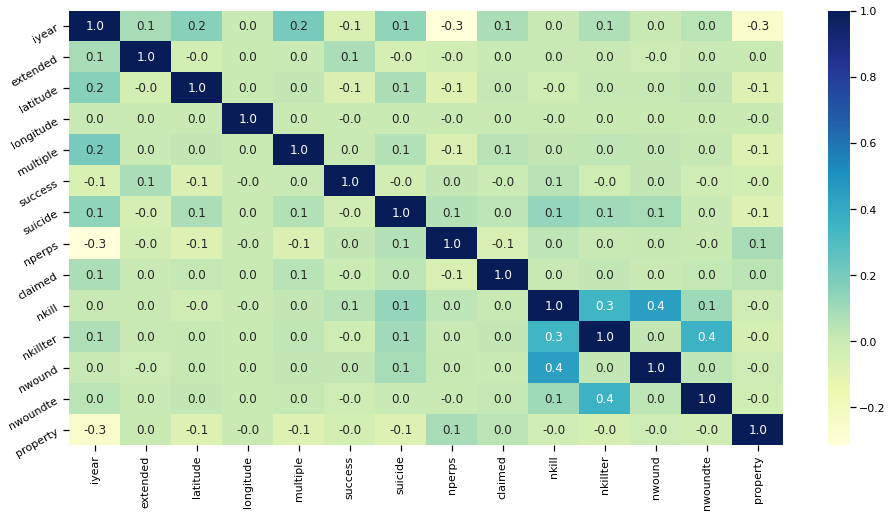

In [ ]:
corr = df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(16,8))
a = sns.heatmap(corr, annot=True, fmt='.1f', cmap='YlGnBu')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

Heat map

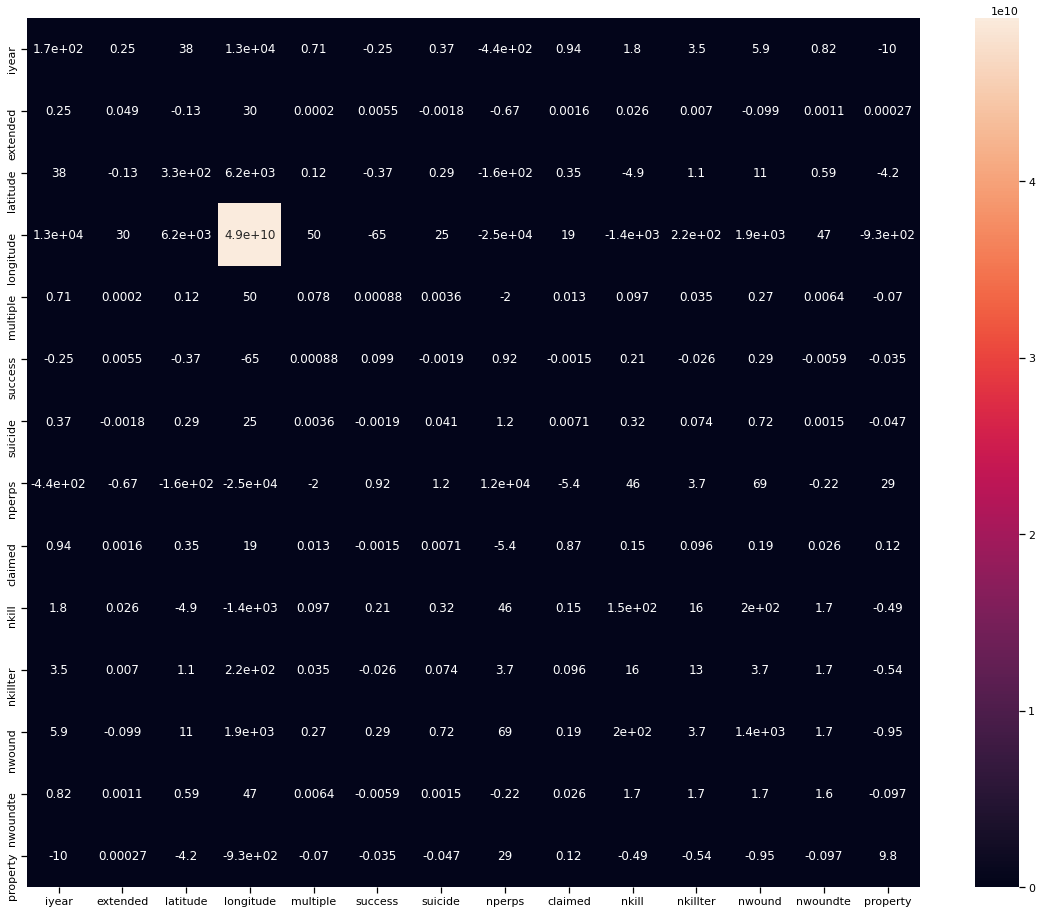

In [ ]:
fig,axes = plt.subplots(1,1,figsize=(20,16))
sns.heatmap(df.cov(), annot =True)
plt.show()

Attacks Type

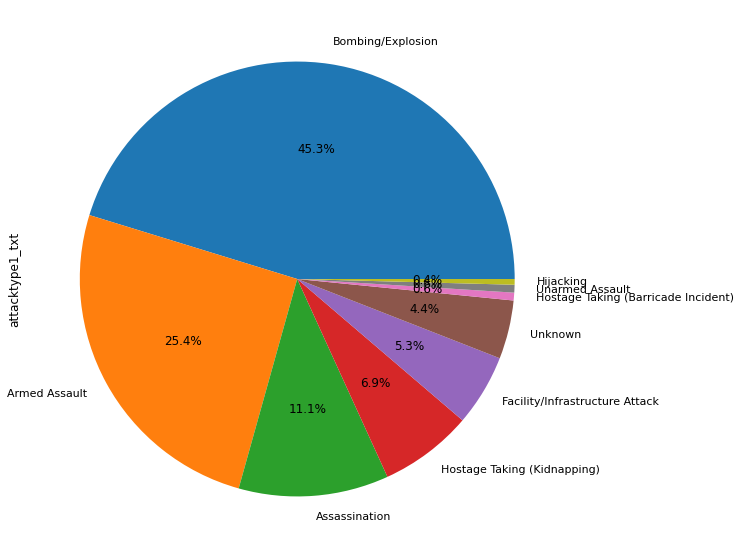

In [ ]:
plt.figure(figsize=(10,10))
df['attacktype1_txt'].value_counts().plot.pie(autopct ="%1.1f%%")
plt.show()

Weapon types

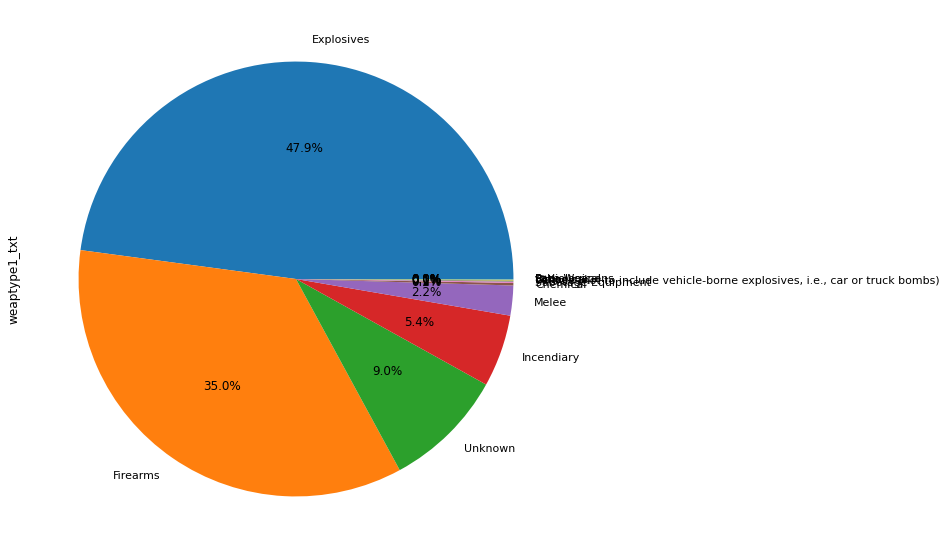

In [ ]:
plt.figure(figsize=(10,10))
df['weaptype1_txt'].value_counts().plot.pie(autopct ="%1.1f%%")
plt.show()

Regions

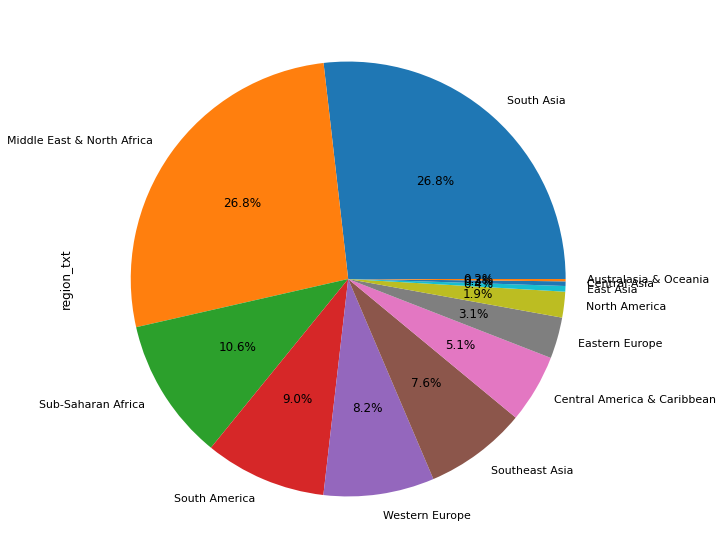

In [ ]:
plt.figure(figsize=(10,10))
df['region_txt'].value_counts().plot.pie(autopct ="%1.1f%%")
plt.show()

Number of Terrorist activities by Regions

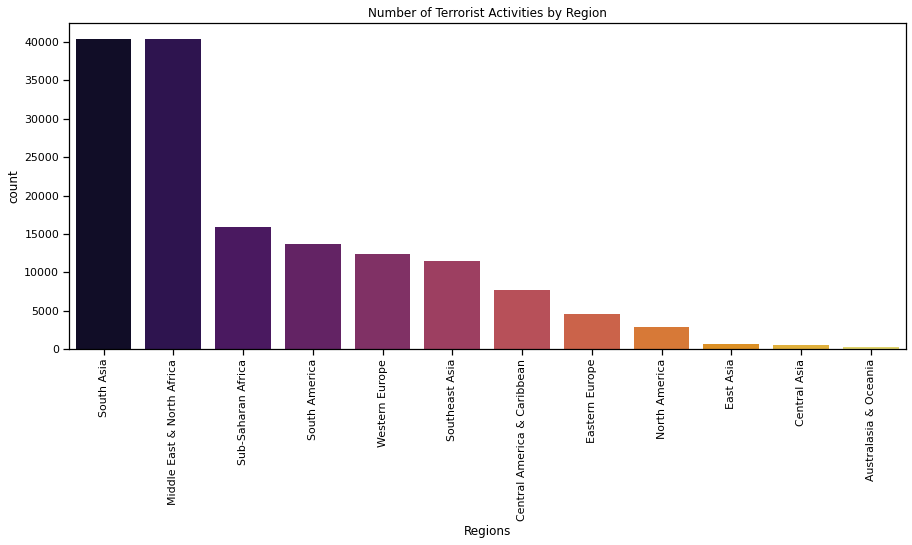

In [ ]:
plt.subplots(figsize =(15,6))
sns.countplot('region_txt',data=df,palette='inferno',order=df['region_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Regions')
plt.title('Number of Terrorist Activities by Region')
plt.show()

Number of Terrorist Activities by Each Year



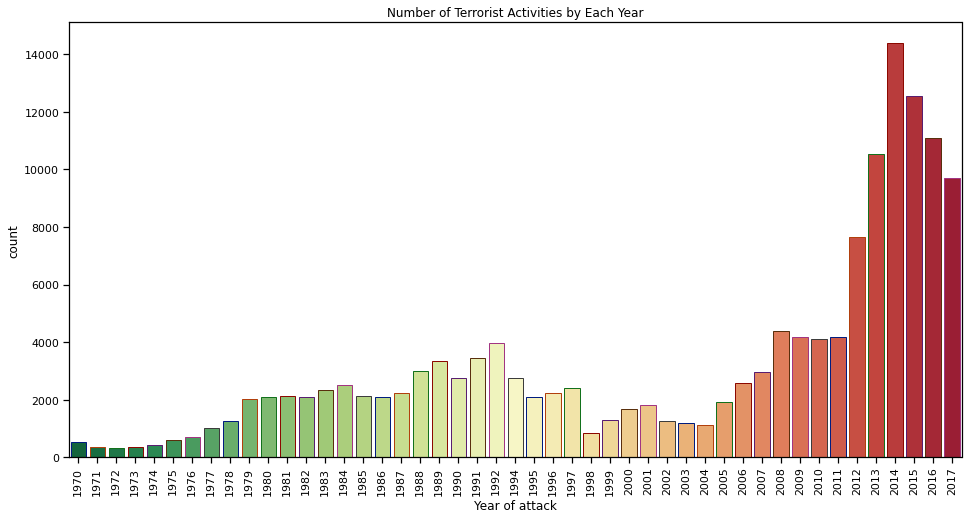

In [ ]:
plt.subplots(figsize =(16,8))
sns.countplot('iyear',data=df,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',8))
plt.xticks(rotation=90)
plt.xlabel('Year of attack')
plt.title('Number of Terrorist Activities by Each Year')
plt.show()

Success Ratio


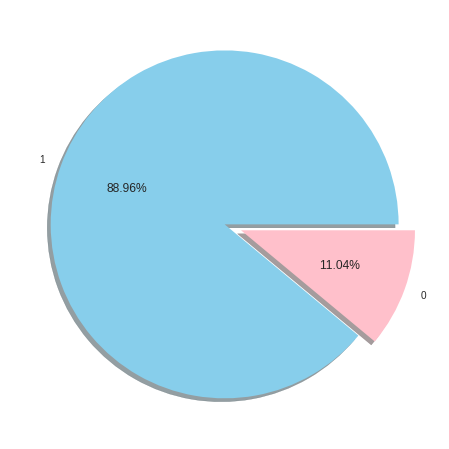

In [ ]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(8,8))
plt.pie(x=data["success"].value_counts(), 
        colors=["skyblue","pink"], 
        labels=['1','0'], 
        shadow = True, 
        autopct="%1.2f%%", 
        explode = (0, 0.1)
        )
plt.show()

Attacking Methods by Terrorists

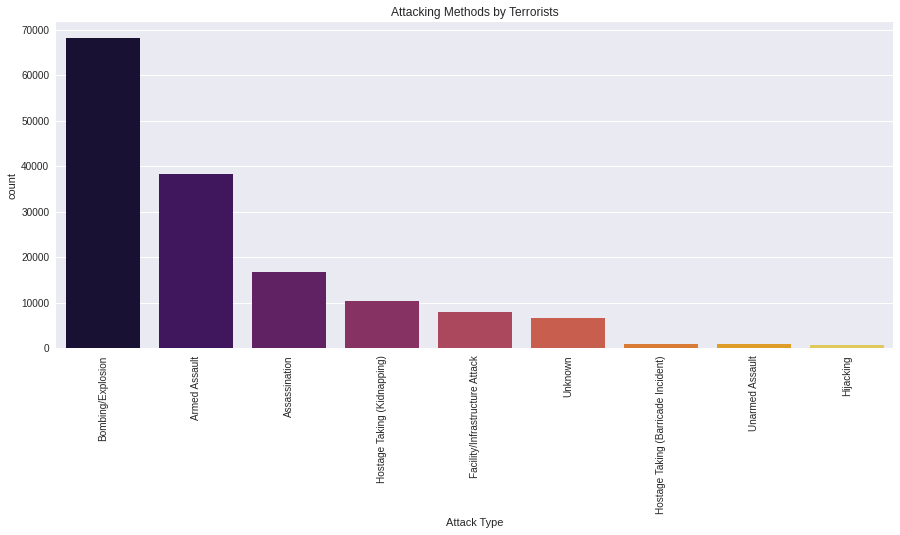

In [ ]:
plt.subplots(figsize =(15,6))
sns.countplot('attacktype1_txt',data=df,palette='inferno',order=df['attacktype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Attack Type')
plt.title('Attacking Methods by Terrorists')
plt.show()

Types of Weapons used by terrorists

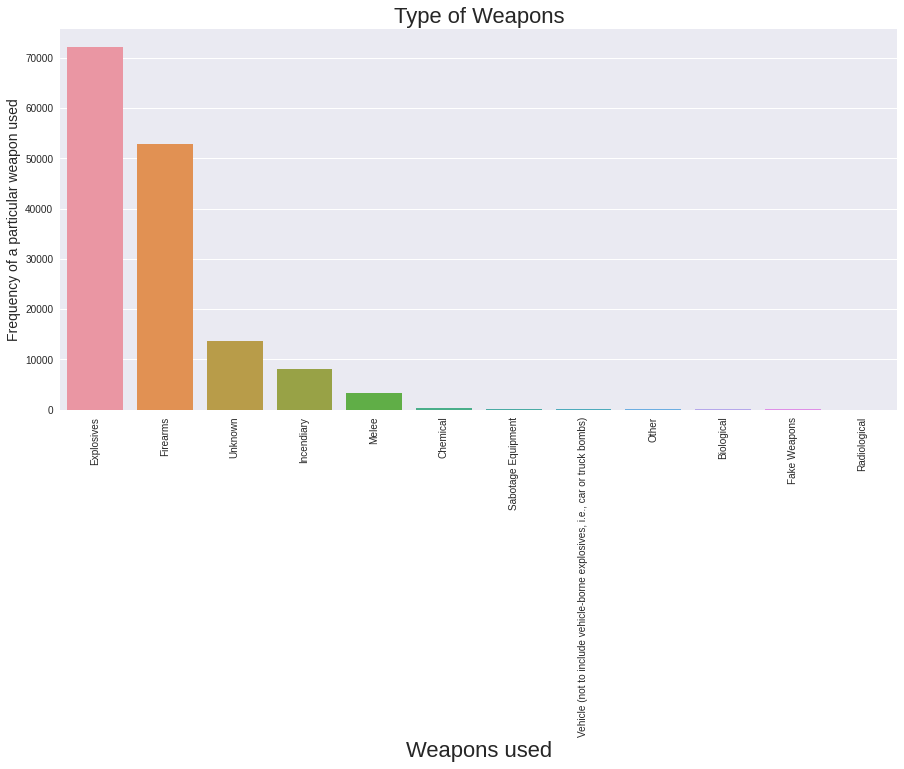

In [ ]:
plt.figure(figsize =(15,7))
sns.barplot(x=df['weaptype1_txt'].value_counts()[:50].index,y =df['weaptype1_txt'].value_counts()[:50].values)
plt.xticks(rotation=90)
plt.xlabel('Weapons used', fontsize =22)
plt.ylabel("Frequency of a particular weapon used", fontsize =14)
plt.title("Type of Weapons", fontsize =22)
plt.show()

Number of Terrorist Activities by Region Wise

Text(0.5, 1.0, 'Number of Terrorist Activities Regionwise')

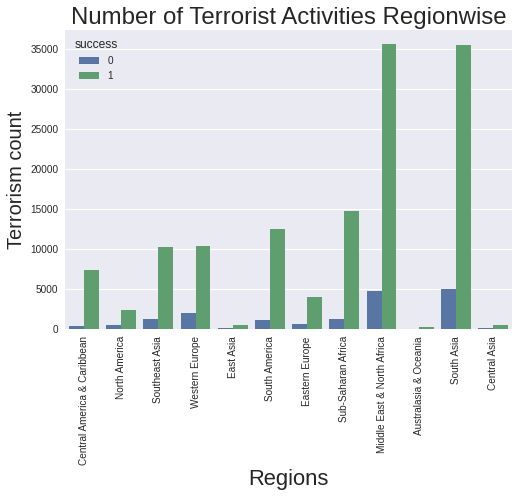

In [ ]:
sns.countplot(x=df['region_txt'], hue ='success', data=df)
plt.xlabel("Regions", fontsize =22)
plt.xticks(rotation=90)
plt.ylabel("Terrorism count", fontsize =20)
plt.title("Number of Terrorist Activities Regionwise", fontsize =24)

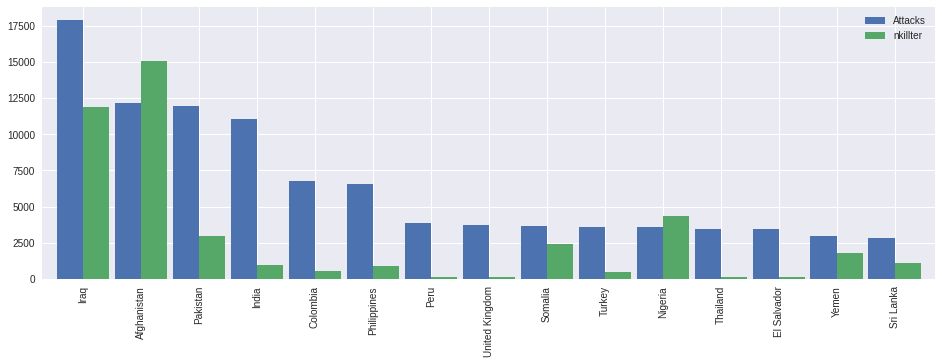

In [ ]:
count_terror =df['country_txt'].value_counts()[:15].to_frame()
count_terror.columns=['Attacks']
count_kill =df.groupby('country_txt')['nkillter'].sum().to_frame()
count_terror.merge(count_kill,left_index =True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(16,5)
plt.show()

**Conclusion :
Countries with the highest number of Terrorist Attacks: Iraq

Region with the highest number of Terrorist Attacks:Middle East & North Africa

Maximum number of people killed by a single terrorist attack are 1570 in iraq

Year with the more attacks: 2014

Month with the most Attacks: 5

Most Attack types: Bombing/Explosions

Year with Highest number of frequencies of attacks : 2014**